In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

### TO DO LIST :
    - Optimize gammas with cross validation
    - Log transform right-skewed data
    - Use matplotlib and subplots instead of pd.hist()

#### Training set

In [2]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv'
y_train, tX_train, ids_train = load_csv_data(DATA_TRAIN_PATH)

#### Test set

In [3]:
DATA_TEST_PATH = '../data/test.csv'
y_test, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [4]:
from implementations import *

### SPLITTING DATA TEST

### Run once only!

In [5]:
tX_train.T[[22,-1]] = tX_train.T[[-1,22]]
tX_test.T[[22,-1]] = tX_test.T[[-1,22]]

In [12]:
from helpers import *

In [13]:
inds = build_k_indices(y_train, 5, 11234)

In [19]:
def cross_validation_logreg(y, x, k_indices, init_w, k, gamma, steps):
    
    x_test = x[k_indices[k]]
    y_test = y[k_indices[k]]
    x_train = x[np.concatenate(([x_train for i,x_train in enumerate(k_indices) if i!=k]), axis=0)]
    y_train = y[np.concatenate(([y_train for i,y_train in enumerate(k_indices) if i!=k]), axis=0)]
    
    w, loss = logistic_regression(y_train, x_train, init_w, steps, gamma)
        
    loss_tr = calculate_loss(y_train,x_train,w)
    loss_te = calculate_loss(y_test ,x_test ,w)
    
    return loss_tr, loss_te, w

In [ ]:
seed = 1
degrees = [3, 4, 5, 6, 7] # degree parameter not used until polynomial regression is tested
k_fold = 4
gammas = np.logspace(-5, 1, 20)
max_iters = 350

# split data in k fold
k_indices = build_k_indices(y, k_fold, seed)

temp_mse_tr = []
temp_mse_te = []
for degree in degrees:
# define lists to store the loss of training data and test data
    mse_tr = []
    mse_te = []

    for ind, gamma in enumerate(gammas):
        temp_tr = 0
        temp_te = 0

        for k in range(k_fold):
            loss_tr, loss_te,_ = cross_validation_gamma(y, tX, k_indices, k, gamma, choose_model, models, degree)
            temp_tr += loss_tr
            temp_te += loss_te
        mse_tr.append(temp_tr/k_fold)
        mse_te.append(temp_te/k_fold)
    min_gamma = np.argmin(mse_te)
    temp_mse_te.append(mse_te[min_gamma])
    
len(temp_mse_te)
min_degree = np.argmin(temp_mse_te)
print('optimal gamma: ', gammas[min_gamma], 'optimal degree: ', degrees[min_degree])

# OPTIMIZATION DEGREE POLY EXP. Logistic regression

In [61]:
""" --- PREPROCESSING --- """

#SPLIT
# training set
y_train_0, y_train_1, y_train_2, tX_train_0, tX_train_1, tX_train_2, ids_train_0, ids_train_1, ids_train_2 = split_data(y_train, tX_train)
# test set
y_test_0, y_test_1, y_test_2, tX_test_0, tX_test_1, tX_test_2, ids_test_0, ids_test_1, ids_test_2 = split_data(y_test, tX_test)

seed = 1
degrees = [3, 4, 5, 6, 7] # degree log degree
k_fold = 4
gammas = np.logspace(-10, -7, 5)
steps = 50

# split data in k fold
k_indices_0 = build_k_indices(y_train_0, k_fold, seed)
k_indices_1 = build_k_indices(y_train_1, k_fold, seed)
k_indices_2 = build_k_indices(y_train_2, k_fold, seed)


optimal_0  = np.zeros((len(degrees), 2), dtype=object)
optimal_1  = np.zeros((len(degrees), 2), dtype=object)
optimal_2  = np.zeros((len(degrees), 2), dtype=object)

for ind, degree in enumerate(degrees): 
    # process data and build model data
    # training set
    ws_0 = []
    ws_1 = []
    ws_2 = []
    
    y0_train, tx0_train = process_and_build(tX_train_0, y_train_0, degree)
    y1_train, tx1_train = process_and_build(tX_train_1, y_train_1, degree)
    y2_train, tx2_train = process_and_build(tX_train_2, y_train_2, degree)
    # test set
    y0_test, tx0_test = process_and_build(tX_test_0, y_test_0, degree)
    y1_test, tx1_test = process_and_build(tX_test_1, y_test_1, degree)
    y2_test, tx2_test = process_and_build(tX_test_2, y_test_2, degree)
    
    rmse_tr_0 = []
    rmse_te_0 = []
    rmse_tr_1 = []
    rmse_te_1 = []
    rmse_tr_2 = []
    rmse_te_2 = []
    
    for gamma in gammas:
        rmse_tr_tmp_0 = []
        rmse_te_tmp_0 = []
        rmse_tr_tmp_1 = []
        rmse_te_tmp_1 = []
        rmse_tr_tmp_2 = []
        rmse_te_tmp_2 = []
        
        for k in range(k_fold):
            
            loss_tr_0, loss_te_0, w_0 = cross_validation_logreg(y0_train, tx0_train, k_indices_0, np.zeros_like(tx0_train[0]), k, gamma, steps)
            loss_tr_1, loss_te_1, w_1 = cross_validation_logreg(y1_train, tx1_train, k_indices_1, np.zeros_like(tx1_train[0]), k, gamma, steps)
            loss_tr_2, loss_te_2, w_2 = cross_validation_logreg(y2_train, tx2_train, k_indices_2, np.zeros_like(tx2_train[0]), k, gamma, steps)
            
            rmse_tr_tmp_0.append(loss_tr_0)
            rmse_te_tmp_0.append(loss_te_0)
            rmse_tr_tmp_1.append(loss_tr_1)
            rmse_te_tmp_1.append(loss_te_1)
            rmse_tr_tmp_2.append(loss_tr_2)
            rmse_te_tmp_2.append(loss_te_2)
            
        ws_0.append(w_0)
        ws_1.append(w_1)
        ws_2.append(w_2)
        
        rmse_te_0.append(np.mean(rmse_te_tmp_0))
        rmse_tr_0.append(np.mean(rmse_tr_tmp_0))
        rmse_te_1.append(np.mean(rmse_te_tmp_1))
        rmse_tr_1.append(np.mean(rmse_tr_tmp_1))
        rmse_te_2.append(np.mean(rmse_te_tmp_2))
        rmse_tr_2.append(np.mean(rmse_tr_tmp_2))
        
    #combine the loss over the folds
    optimal_0[ind][0] = np.asarray(rmse_te_0)
    optimal_0[ind][1] = np.asarray(ws_0[np.argmin(rmse_te_0)])
    optimal_1[ind][0] = np.asarray(rmse_te_1)
    optimal_1[ind][1] = np.asarray(ws_1[np.argmin(rmse_te_1)])
    optimal_2[ind][0] = np.asarray(rmse_te_2)
    optimal_2[ind][1] = np.asarray(ws_2[np.argmin(rmse_te_2)])

# OPTIMIZE LAMBDAS FOR DEGREES = (3,3,7)

In [72]:
""" --- PREPROCESSING --- """

#SPLIT
# training set
y_train_0, y_train_1, y_train_2, tX_train_0, tX_train_1, tX_train_2, ids_train_0, ids_train_1, ids_train_2 = split_data(y_train, tX_train)
# test set
y_test_0, y_test_1, y_test_2, tX_test_0, tX_test_1, tX_test_2, ids_test_0, ids_test_1, ids_test_2 = split_data(y_test, tX_test)

seed = 1
k_fold = 4
gammas = np.logscale(-10, -5, 10)
steps = 3000

# split data in k fold
k_indices_0 = build_k_indices(y_train_0, k_fold, seed)
k_indices_1 = build_k_indices(y_train_1, k_fold, seed)
k_indices_2 = build_k_indices(y_train_2, k_fold, seed)


optimal_0  = np.zeros((len(degrees), 2), dtype=object)
optimal_1  = np.zeros((len(degrees), 2), dtype=object)
optimal_2  = np.zeros((len(degrees), 2), dtype=object)


# process data and build model data
# training set
ws_0 = []
ws_1 = []
ws_2 = []
    
y0_train, tx0_train = process_and_build(tX_train_0, y_train_0, 3)
y1_train, tx1_train = process_and_build(tX_train_1, y_train_1, 3)
y2_train, tx2_train = process_and_build(tX_train_2, y_train_2, 7)
# test set
y0_test, tx0_test = process_and_build(tX_test_0, y_test_0, 3)
y1_test, tx1_test = process_and_build(tX_test_1, y_test_1, 3)
y2_test, tx2_test = process_and_build(tX_test_2, y_test_2, 7)
    
rmse_tr_0 = []
rmse_te_0 = []
rmse_tr_1 = []
rmse_te_1 = []
rmse_tr_2 = []
rmse_te_2 = []
    
for gamma in gammas:
    rmse_tr_tmp_0 = []
    rmse_te_tmp_0 = []
    rmse_tr_tmp_1 = []
    rmse_te_tmp_1 = []
    rmse_tr_tmp_2 = []
    rmse_te_tmp_2 = []
        
    for k in range(k_fold):
            
        loss_tr_0, loss_te_0, w_0 = cross_validation_logreg(y0_train, tx0_train, k_indices_0, np.zeros_like(tx0_train[0]), k, gamma, steps)
        loss_tr_1, loss_te_1, w_1 = cross_validation_logreg(y1_train, tx1_train, k_indices_1, np.zeros_like(tx1_train[0]), k, gamma, steps)
        loss_tr_2, loss_te_2, w_2 = cross_validation_logreg(y2_train, tx2_train, k_indices_2, np.zeros_like(tx2_train[0]), k, gamma, steps)
            
        rmse_tr_tmp_0.append(loss_tr_0)
        rmse_te_tmp_0.append(loss_te_0)
        rmse_tr_tmp_1.append(loss_tr_1)
        rmse_te_tmp_1.append(loss_te_1)
        rmse_tr_tmp_2.append(loss_tr_2)
        rmse_te_tmp_2.append(loss_te_2)
            
    ws_0.append(w_0)
    ws_1.append(w_1)
    ws_2.append(w_2)
        
    rmse_te_0.append(np.mean(rmse_te_tmp_0))
    rmse_tr_0.append(np.mean(rmse_tr_tmp_0))
    rmse_te_1.append(np.mean(rmse_te_tmp_1))
    rmse_tr_1.append(np.mean(rmse_tr_tmp_1))
    rmse_te_2.append(np.mean(rmse_te_tmp_2))
    rmse_tr_2.append(np.mean(rmse_tr_tmp_2))
        
opti_weight_0 = ws_0[np.argmin(rmse_te_0)]
opti_gamma_0 = gammas[np.argmin(rmse_te_0)]
opti_weight_1 = ws_1[np.argmin(rmse_te_1)]
opti_gamma_1 = gammas[np.argmin(rmse_te_1)]
opti_weight_2 = ws_2[np.argmin(rmse_te_2)]
opti_gamma_2 = gammas[np.argmin(rmse_te_2)]

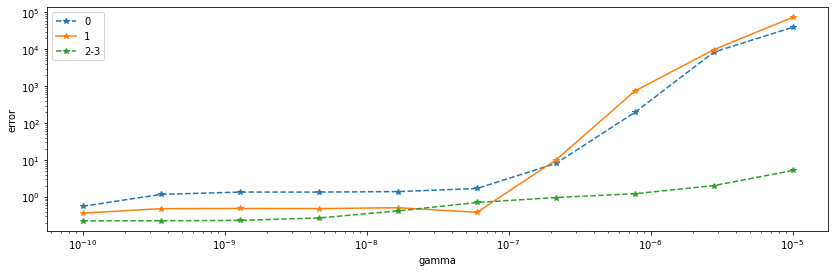

In [82]:
f = plt.figure(figsize=(14,14)) # change this if needed

#degree 1
ax1 = f.add_subplot(311)
ax1.semilogx(gammas, rmse_te_0, ls="--" , marker="*", label="0")
ax1.semilogx(gammas, rmse_te_1, ls="-" , marker="*", label="1")
ax1.semilogx(gammas, rmse_te_2, ls="--" , marker="*", label="2-3")

plt.xlabel("gamma")
plt.ylabel("error")
plt.yscale("log")
plt.legend()
plt.savefig('test.jpeg')
plt.show()

In [ ]:
""" --- PREPROCESSING --- """

y_train[np.where(y_train==-1)] = 0
y_test[np.where(y_test==-1)] = 0
#SPLIT
# training set
y_train_0, y_train_1, y_train_2, tX_train_0, tX_train_1, tX_train_2, ids_train_0, ids_train_1, ids_train_2 = split_data(y_train, tX_train)
# test set
y_test_0, y_test_1, y_test_2, tX_test_0, tX_test_1, tX_test_2, ids_test_0, ids_test_1, ids_test_2 = split_data(y_test, tX_test)


# process data and build model data
# training set
y0_train, tx0_train = process_and_build(tX_train_0, y_train_0, 3)
y1_train, tx1_train = process_and_build(tX_train_1, y_train_1, 3)
y2_train, tx2_train = process_and_build(tX_train_2, y_train_2, 7)
# test set
y0_test, tx0_test = process_and_build(tX_test_0, y_test_0, 3)
y1_test, tx1_test = process_and_build(tX_test_1, y_test_1, 3)
y2_test, tx2_test = process_and_build(tX_test_2, y_test_2, 7)


### TO DO : CROSS VALIDATION TO optimize gamma
gamma0 = 1e-10
iters0 = 5000

gamma1 = 5e-8
iters1 = 5000

gamma2 = 1e-10
iters2 = 5000


""" Fit the models """
weights_0, losses_0 = logistic_regression(y0_train, tx0_train, np.zeros_like(tx0_train[0]), iters0, gamma0)
weights_1, losses_1 = logistic_regression(y1_train, tx1_train, np.zeros_like(tx1_train[0]), iters1, gamma1)
weights_2, losses_2 = logistic_regression(y2_train, tx2_train, np.zeros_like(tx2_train[0]), iters2, gamma2)

""" Predict """
y_pred = predict(weights_0, weights_1, weights_2, tx0_test, tx1_test, tx2_test, y_test, ids_test_0, ids_test_1, ids_test_2)
""" Submission in csv """
create_csv_submission(ids_test, y_pred, "prediction.csv")

In [67]:
np.argmin([np.argmin(optimal_0[0][0]), np.argmin(optimal_0[1][0]), np.argmin(optimal_0[2][0]), np.argmin(optimal_0[3][0]), np.argmin(optimal_0[4][0])])

0

In [68]:
np.argmin([np.argmin(optimal_1[0][0]), np.argmin(optimal_1[1][0]), np.argmin(optimal_1[2][0]), np.argmin(optimal_1[3][0]), np.argmin(optimal_1[4][0])])

0

In [69]:
np.argmin([np.argmin(optimal_2[0][0]), np.argmin(optimal_2[1][0]), np.argmin(optimal_2[2][0]), np.argmin(optimal_2[3][0]), np.argmin(optimal_2[4][0])])

4

In [65]:
np.argmin(optimal_0[0][0])

0

### TEST standardization, mean correction

In [1]:
x = np.array([[1, 2, 3],[4, 5, 6],[1, 4, 5]])
#Store ignored column
temp = x[:,-1]
x =  np.delete(x, -1, axis=1)
#Mean feature-wise
mean_col = np.mean(x, axis=0)
#Mean = 0
x = x - mean_col
#STD feature-wise
std_col = np.std(x, axis=0)
#Std = 1
x[:, std_col > 0] = x[:, std_col > 0] / std_col[std_col > 0]

NameError: name 'np' is not defined

In [57]:
np.c_[x, temp]

array([[-0.70710678, -1.33630621,  3.        ],
       [ 1.41421356,  1.06904497,  6.        ],
       [-0.70710678,  0.26726124,  5.        ]])

### FORBIDDEN VIZ
TO DO

In [ ]:
import pandas as pd
df = pd.read_csv(DATA_TRAIN_PATH)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7708300828>,
      dtype=object)

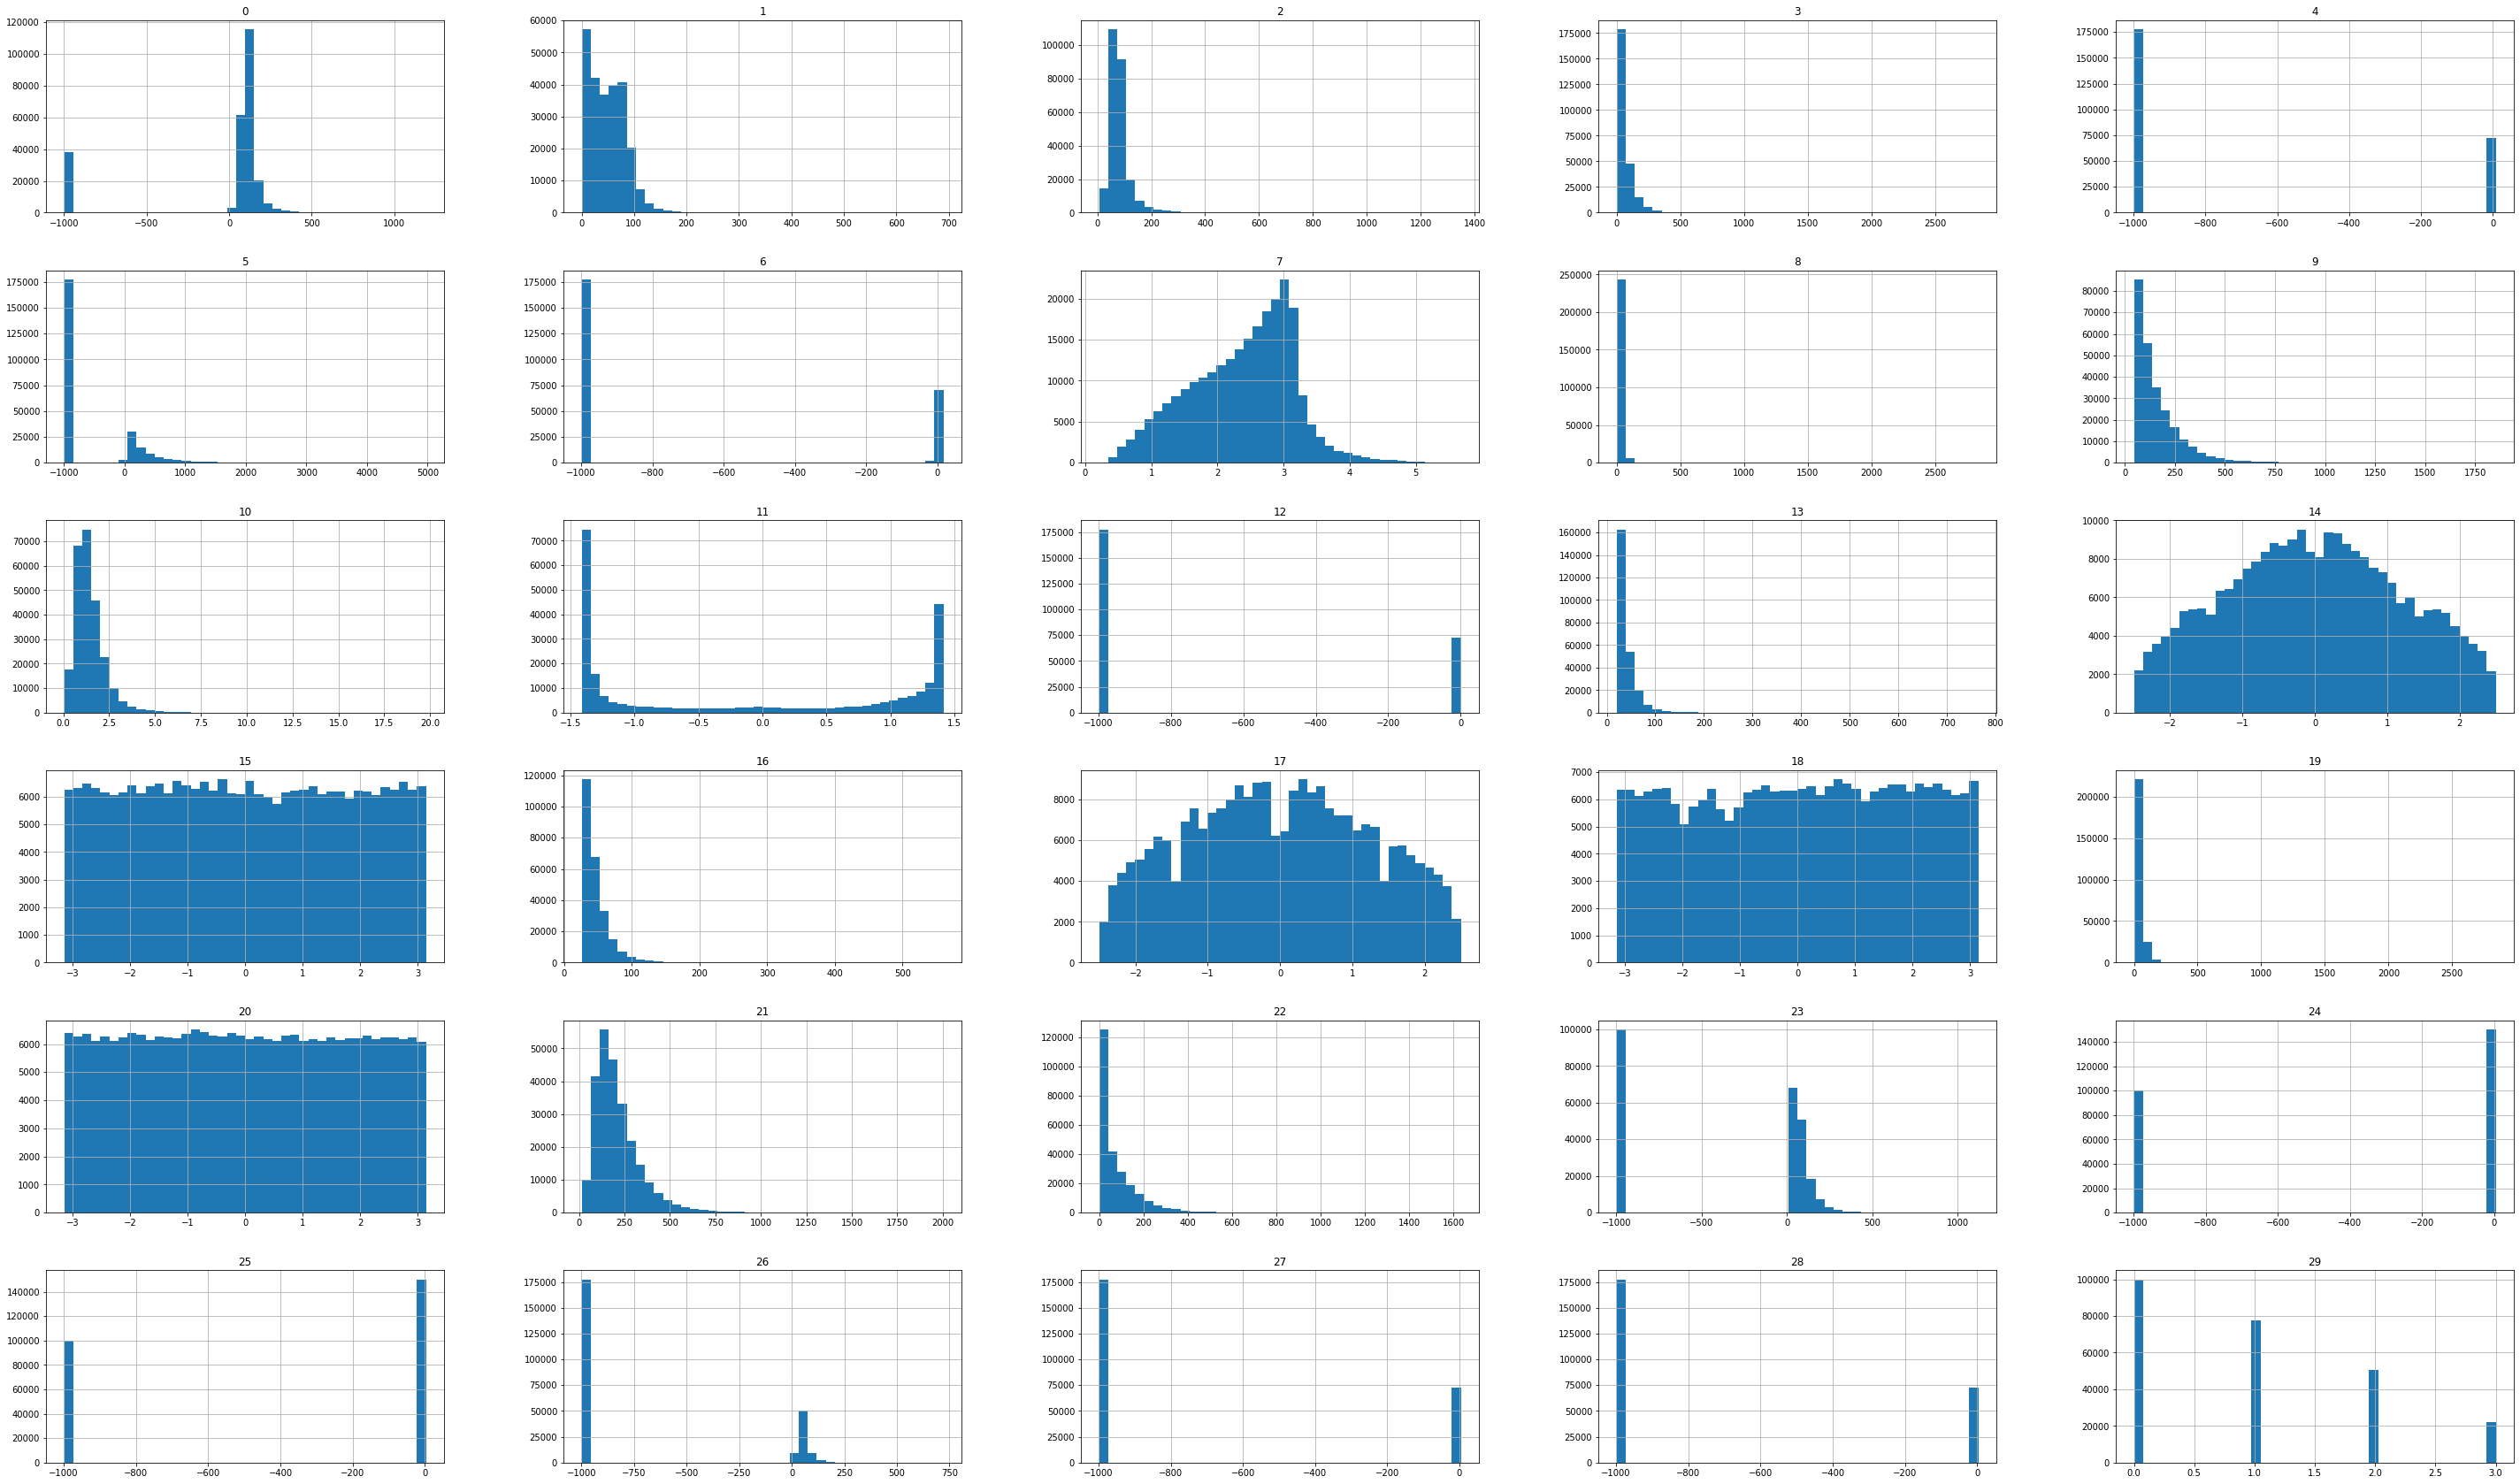

In [29]:
import pandas as pd

df = pd.DataFrame(tX)
df.hist(figsize=(50, 30), bins =40)

In [12]:
import matplotlib.pyplot as pl
import matplotlib
import pandas as pd
import numpy as np

In [9]:
df = pd.DataFrame(np.where(tX == -999, 0, tX))

In [10]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,-0.277,258.733,2.0,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,160.937,68.768,103.235,48.146,0.00,0.000,0.000,3.473,2.078,125.157,...,-1.916,164.546,1.0,46.226,0.725,1.158,0.000,0.00,0.000,46.226
2,0.000,162.172,125.953,35.635,0.00,0.000,0.000,3.148,9.336,197.814,...,-2.186,260.414,1.0,44.251,2.053,-2.028,0.000,0.00,0.000,44.251
3,143.905,81.417,80.943,0.414,0.00,0.000,0.000,3.310,0.414,75.968,...,0.060,86.062,0.0,0.000,0.000,0.000,0.000,0.00,0.000,0.000
4,175.864,16.915,134.805,16.405,0.00,0.000,0.000,3.891,16.405,57.983,...,-0.871,53.131,0.0,0.000,0.000,0.000,0.000,0.00,0.000,0.000


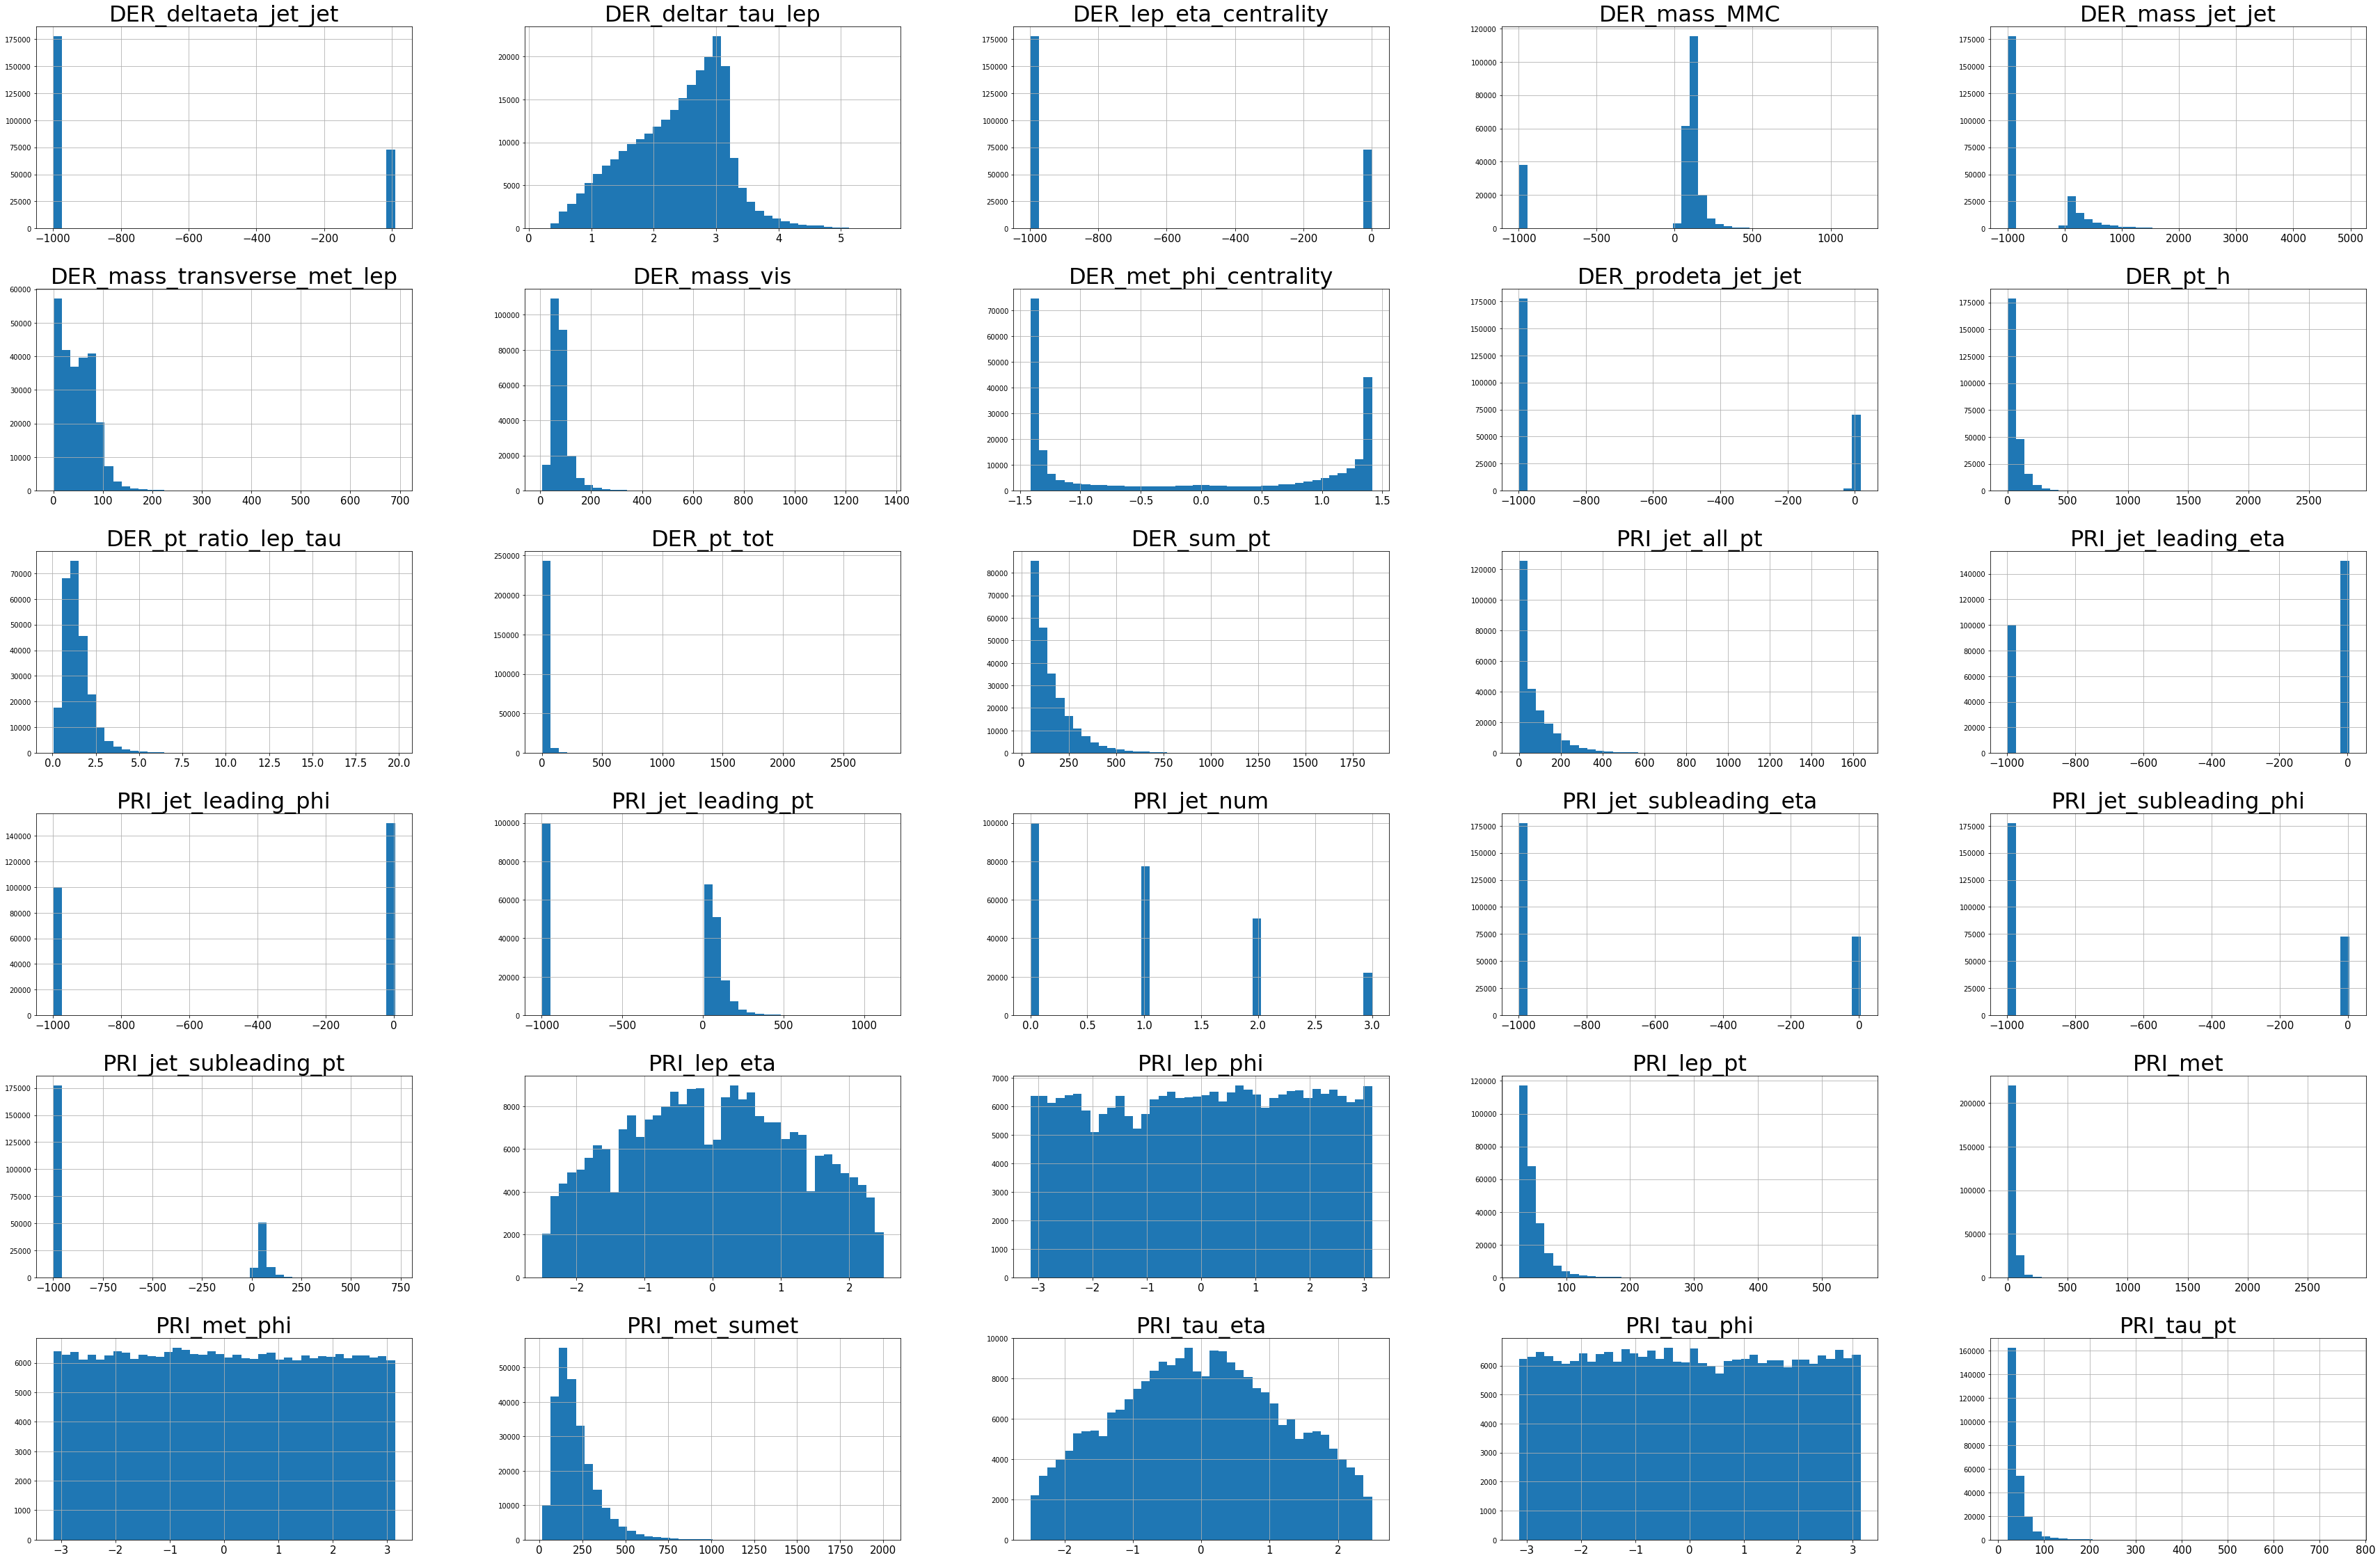

In [20]:
df = pd.DataFrame(tX)
df.columns=[
 'DER_mass_MMC',
 'DER_mass_transverse_met_lep',
 'DER_mass_vis',
 'DER_pt_h',
 'DER_deltaeta_jet_jet',
 'DER_mass_jet_jet',
 'DER_prodeta_jet_jet',
 'DER_deltar_tau_lep',
 'DER_pt_tot',
 'DER_sum_pt',
 'DER_pt_ratio_lep_tau',
 'DER_met_phi_centrality',
 'DER_lep_eta_centrality',
 'PRI_tau_pt',
 'PRI_tau_eta',
 'PRI_tau_phi',
 'PRI_lep_pt',
 'PRI_lep_eta',
 'PRI_lep_phi',
 'PRI_met',
 'PRI_met_phi',
 'PRI_met_sumet',
 'PRI_jet_num',
 'PRI_jet_leading_pt',
 'PRI_jet_leading_eta',
 'PRI_jet_leading_phi',
 'PRI_jet_subleading_pt',
 'PRI_jet_subleading_eta',
 'PRI_jet_subleading_phi',
 'PRI_jet_all_pt']
params = {'axes.titlesize':'32',
          'xtick.labelsize':'15',
          'ytick.labelsize':'10'}
matplotlib.rcParams.update(params)
#df = df.drop(['Id'], axis = 1)
ax = df.hist(figsize=(60, 40), bins =40)
pl.savefig('fig1_raw.jpeg')

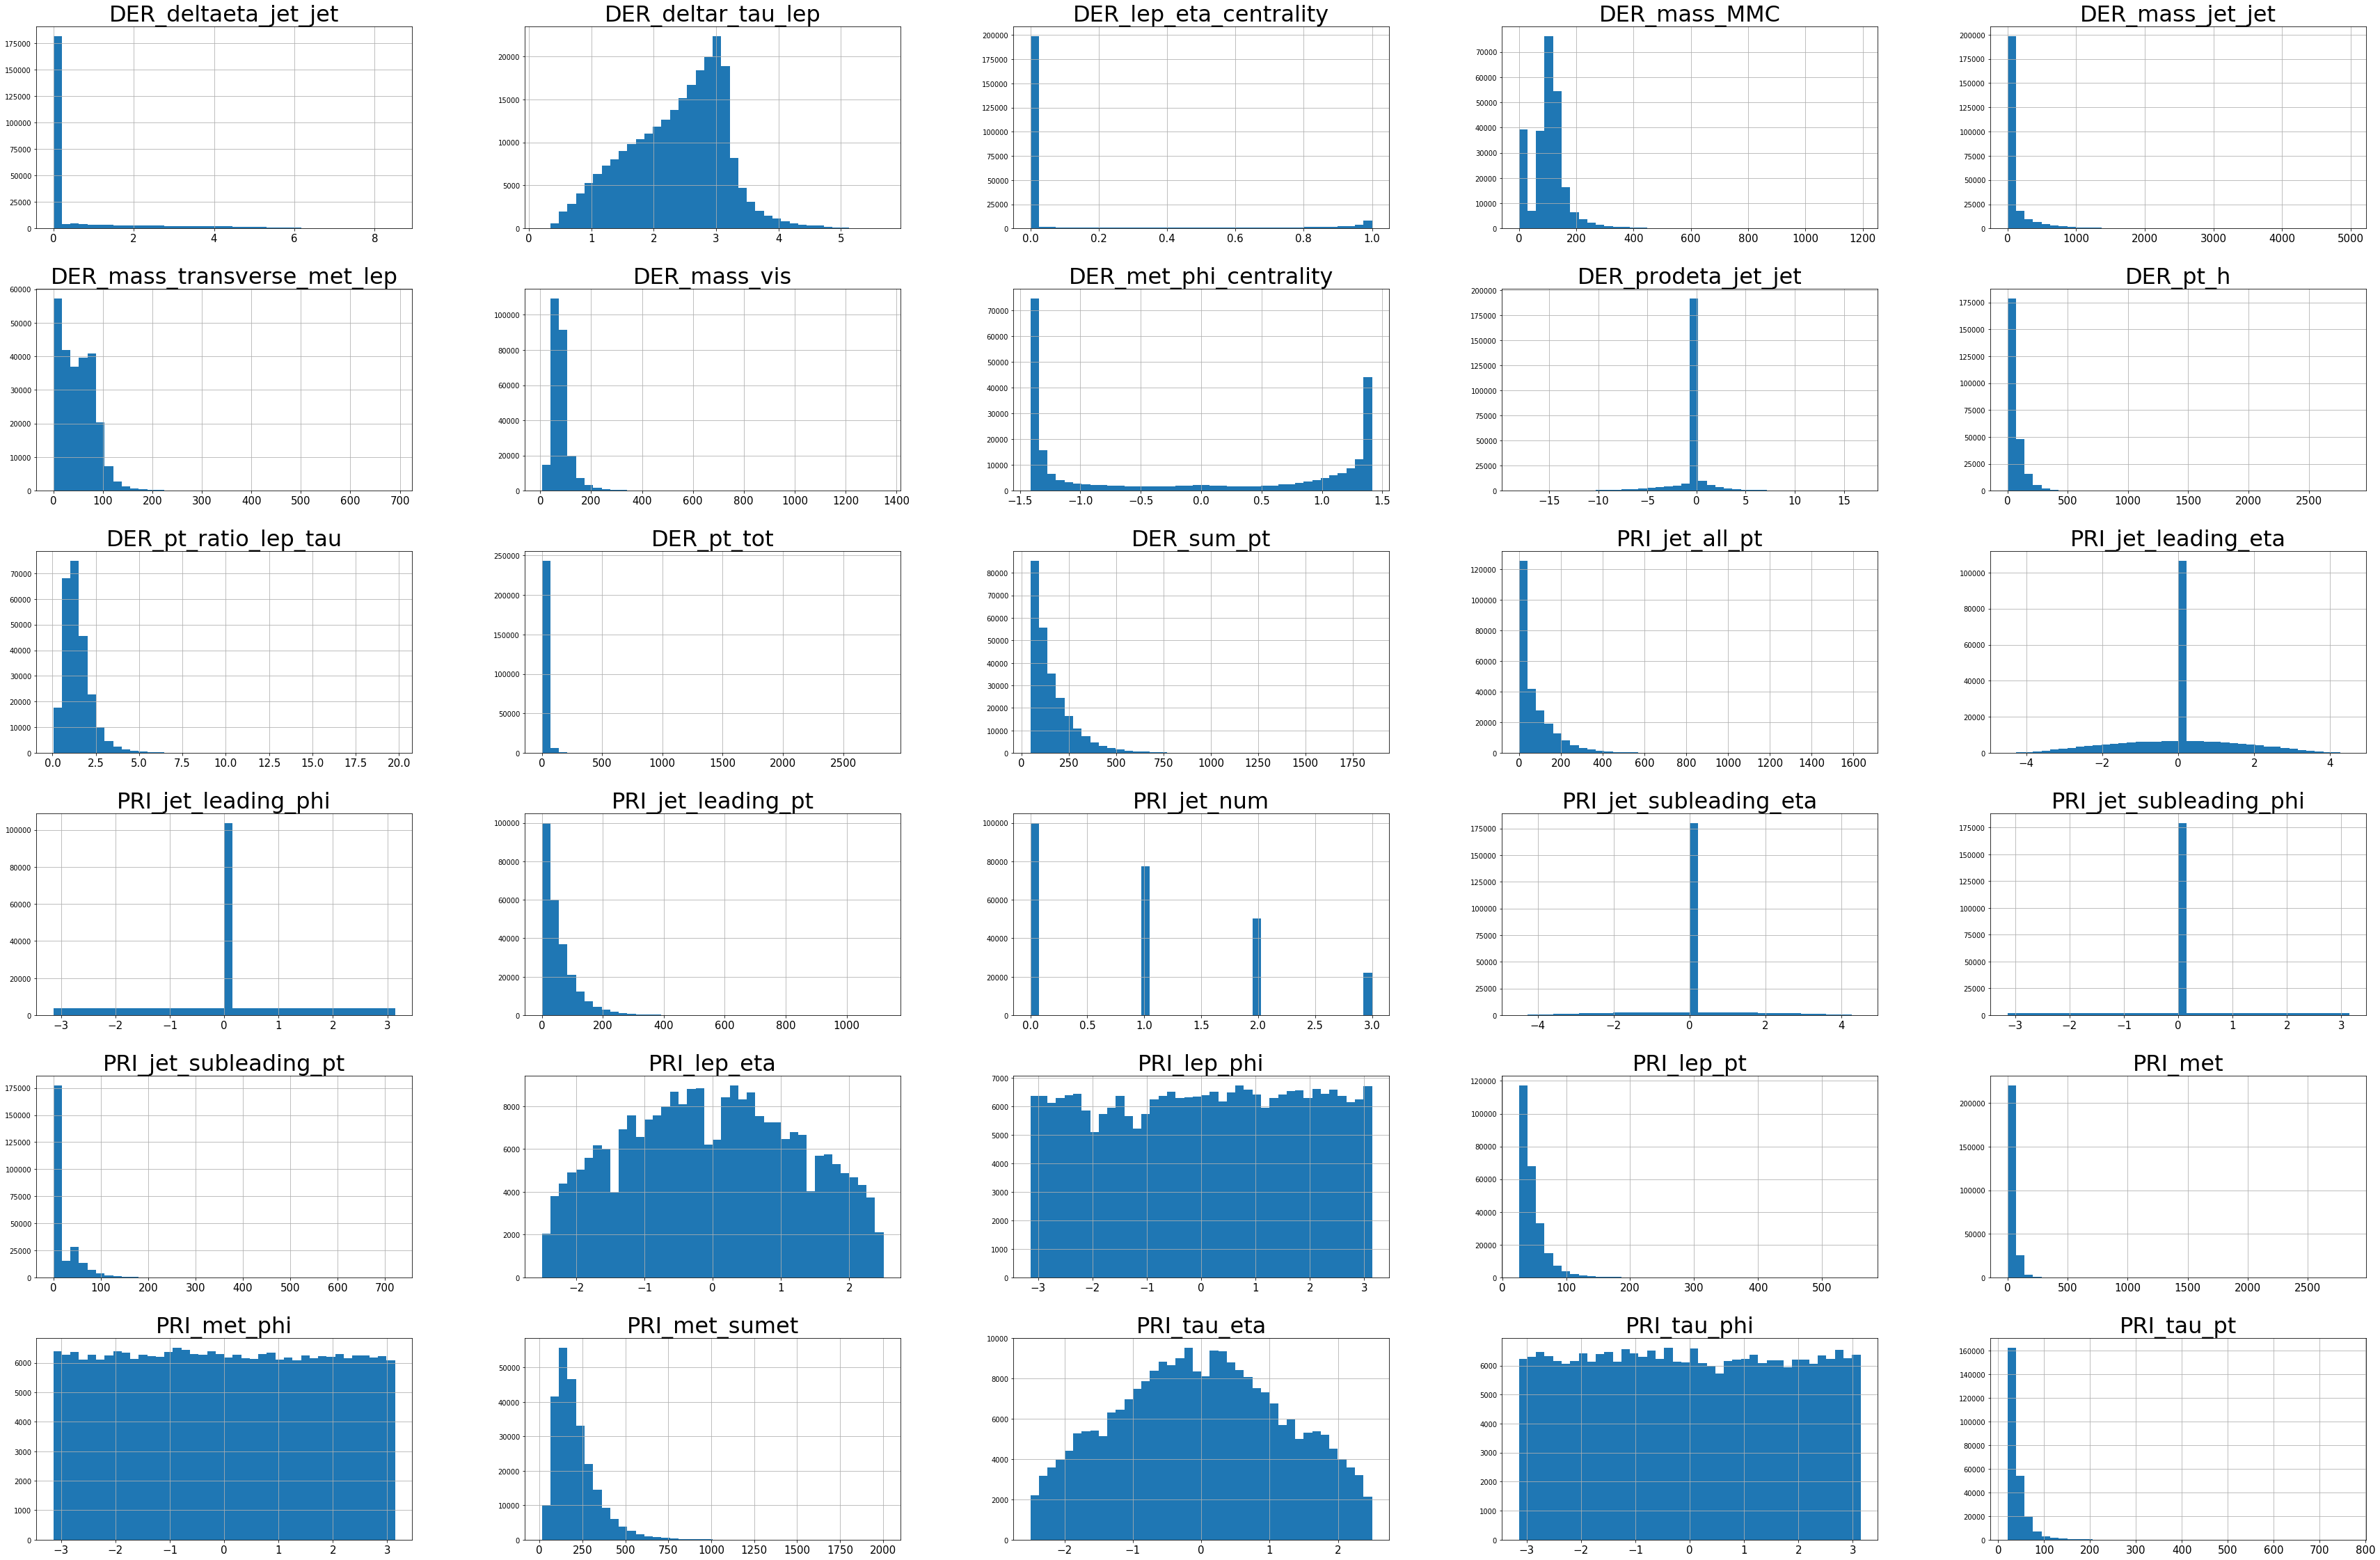

In [21]:
df = pd.DataFrame(np.where(tX == -999, 0, tX))
df.columns=[
 'DER_mass_MMC',
 'DER_mass_transverse_met_lep',
 'DER_mass_vis',
 'DER_pt_h',
 'DER_deltaeta_jet_jet',
 'DER_mass_jet_jet',
 'DER_prodeta_jet_jet',
 'DER_deltar_tau_lep',
 'DER_pt_tot',
 'DER_sum_pt',
 'DER_pt_ratio_lep_tau',
 'DER_met_phi_centrality',
 'DER_lep_eta_centrality',
 'PRI_tau_pt',
 'PRI_tau_eta',
 'PRI_tau_phi',
 'PRI_lep_pt',
 'PRI_lep_eta',
 'PRI_lep_phi',
 'PRI_met',
 'PRI_met_phi',
 'PRI_met_sumet',
 'PRI_jet_num',
 'PRI_jet_leading_pt',
 'PRI_jet_leading_eta',
 'PRI_jet_leading_phi',
 'PRI_jet_subleading_pt',
 'PRI_jet_subleading_eta',
 'PRI_jet_subleading_phi',
 'PRI_jet_all_pt']
params = {'axes.titlesize':'32',
          'xtick.labelsize':'15',
          'ytick.labelsize':'10'}
matplotlib.rcParams.update(params)
#df = df.drop(['Id'], axis = 1)
ax = df.hist(figsize=(60, 40), bins =40)
pl.savefig('fig1_0.jpeg')

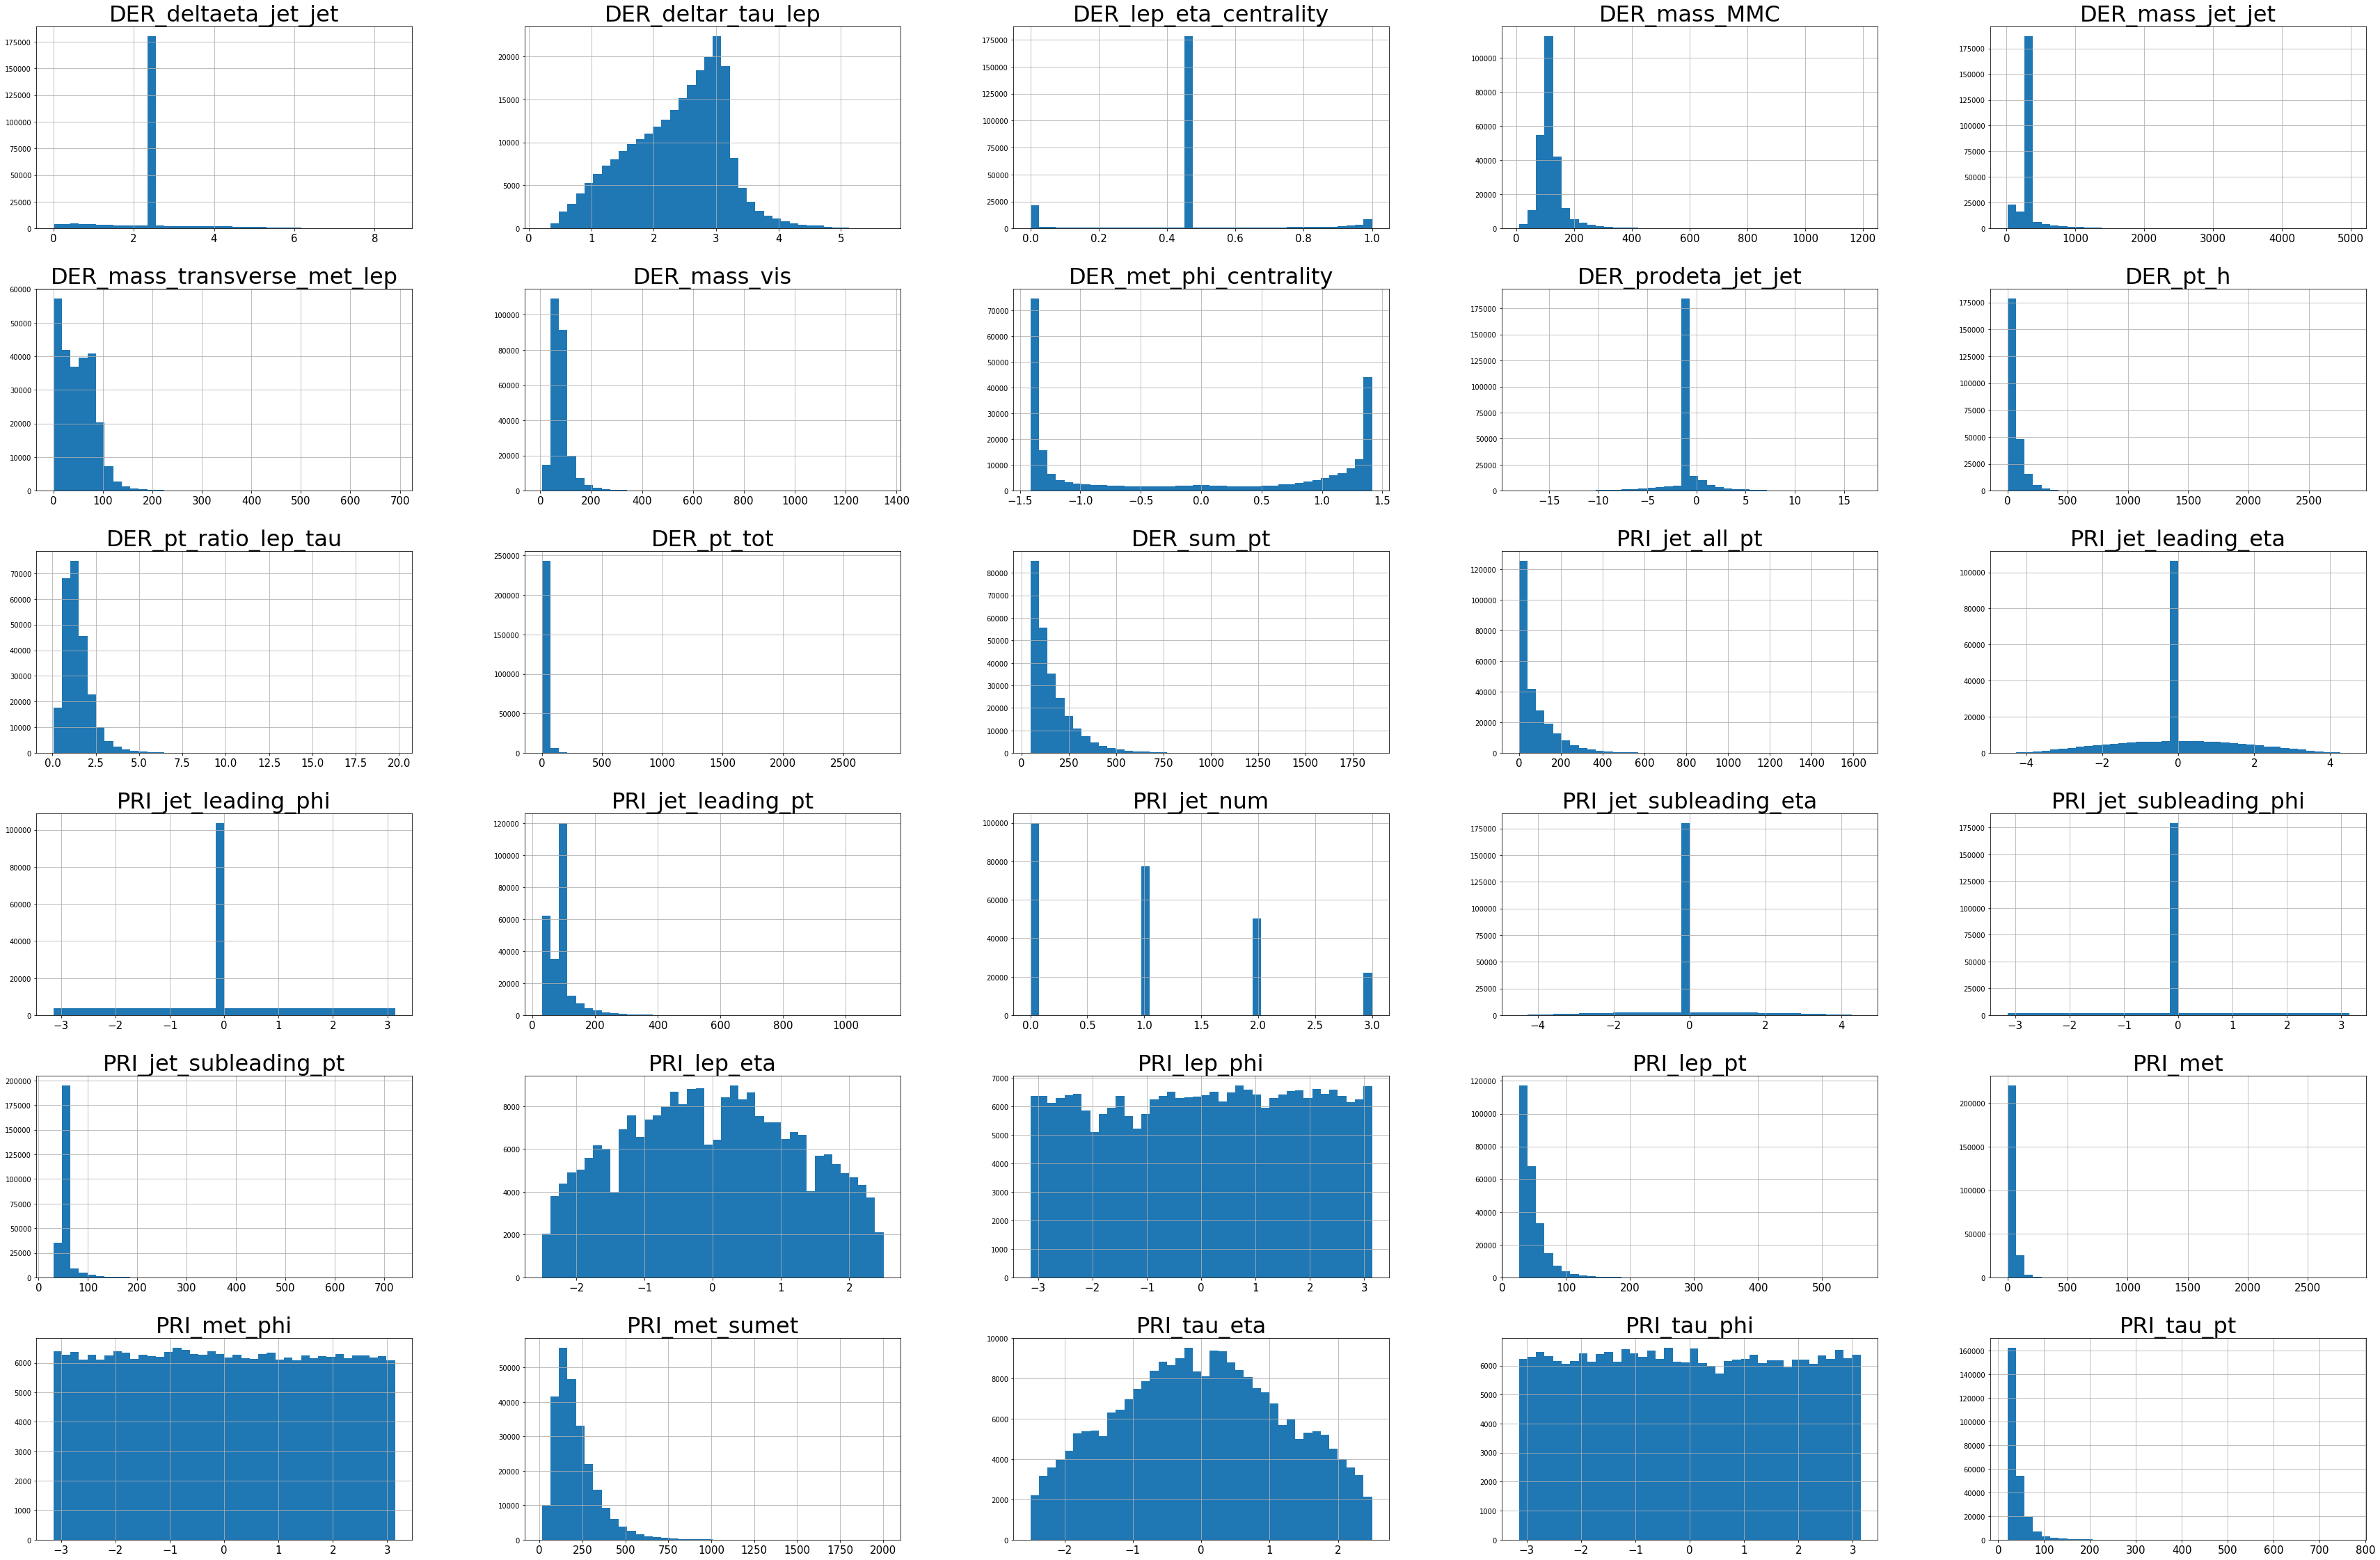

In [24]:
tX_corrected = np.where(tX == -999, np.nan, tX)

col_mean = np.nanmean(tX_corrected, axis=0)

# Find indices that need to be replaced
inds = np.where(np.isnan(tX_corrected))

# Place column means in the indices. Align the arrays using take
tX_corrected[inds] = np.take(col_mean, inds[1])
df = pd.DataFrame(tX_corrected)
df.columns=[
 'DER_mass_MMC',
 'DER_mass_transverse_met_lep',
 'DER_mass_vis',
 'DER_pt_h',
 'DER_deltaeta_jet_jet',
 'DER_mass_jet_jet',
 'DER_prodeta_jet_jet',
 'DER_deltar_tau_lep',
 'DER_pt_tot',
 'DER_sum_pt',
 'DER_pt_ratio_lep_tau',
 'DER_met_phi_centrality',
 'DER_lep_eta_centrality',
 'PRI_tau_pt',
 'PRI_tau_eta',
 'PRI_tau_phi',
 'PRI_lep_pt',
 'PRI_lep_eta',
 'PRI_lep_phi',
 'PRI_met',
 'PRI_met_phi',
 'PRI_met_sumet',
 'PRI_jet_num',
 'PRI_jet_leading_pt',
 'PRI_jet_leading_eta',
 'PRI_jet_leading_phi',
 'PRI_jet_subleading_pt',
 'PRI_jet_subleading_eta',
 'PRI_jet_subleading_phi',
 'PRI_jet_all_pt']
params = {'axes.titlesize':'32',
          'xtick.labelsize':'15',
          'ytick.labelsize':'10'}
matplotlib.rcParams.update(params)
#df = df.drop(['Id'], axis = 1)
ax = df.hist(figsize=(60, 40), bins =40)
pl.savefig('fig1_mean.jpeg')

In [19]:
df_clean = pd.DataFrame(clean(tX))
df_clean.hist(figsize=(50, 30), bins =40)

ValueError: all the input arrays must have same number of dimensions

In [26]:
weights, loss = least_squares(y, tX)

In [34]:
weights

array([ 8.03494349e-05, -7.20202266e-03, -6.05417274e-03, -5.47559077e-04,
       -1.93874702e-02,  4.73451615e-04, -2.60379061e-02,  3.25106299e-01,
       -3.80780008e-05, -2.72785897e+00, -2.21220141e-01,  9.50794097e-02,
        6.40351626e-02,  2.73611865e+00, -3.31801110e-04, -9.54325152e-04,
        2.74087539e+00, -5.34165279e-04,  9.73498884e-04,  3.69225050e-03,
        3.54487165e-04, -5.43344617e-04, -3.30448034e-01, -1.40800496e-03,
        8.31432874e-04,  1.02117271e-03, -1.68047418e-03, -5.83664770e-03,
       -1.11088005e-02,  2.72831890e+00])

In [22]:
y_pred = predict_labels()

array([ 8.03494349e-05, -7.20202266e-03, -6.05417274e-03, -5.47559077e-04,
       -1.93874702e-02,  4.73451615e-04, -2.60379061e-02,  3.25106299e-01,
       -3.80780008e-05, -2.72785897e+00, -2.21220141e-01,  9.50794097e-02,
        6.40351626e-02,  2.73611865e+00, -3.31801110e-04, -9.54325152e-04,
        2.74087539e+00, -5.34165279e-04,  9.73498884e-04,  3.69225050e-03,
        3.54487165e-04, -5.43344617e-04, -3.30448034e-01, -1.40800496e-03,
        8.31432874e-04,  1.02117271e-03, -1.68047418e-03, -5.83664770e-03,
       -1.11088005e-02,  2.72831890e+00])

## Generate predictions and save ouput in csv format for submission:

In [35]:
OUTPUT_PATH = '../data/submission.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

In [36]:
np.in1d(_,y_pred).sum()/len(y_pred)

1.0